# 0 - quickStart Example
***

This notebook will guide you through the basic functionality of PV_ICE. Once you are done with this tutorial, you will be able to:
* Set up a PV_ICE simulation and create scenarios.
* Compute Mass and Energy flows calculations.
* Plot results.

Please refer to the [PV_ICE documentation page](https://pv-ice.readthedocs.io/en/latest/index.html) to get a complete insight of the package.

## 0.1 &emsp; Simulation Setup <a id='0.1'></a>

To setup a PV_ICE simulation we need (1) import necessary packages, (2) create simulation folder path, (3) create a baseline path.

First let's import the necessary libraries for this notebook:

In [1]:
import os # Creates and removes a directory (folder), fetch its contents, change and identify the current directory
from pathlib import Path
import PV_ICE # Load PV_ICE package

print("Successfully imported PV_ICE, version ", PV_ICE.__version__)

Successfully imported PV_ICE, version  v0.2.0+459.g7b52e10.dirty


#### 1. Create a folder for your simulation, and load PV ICE

Let's set the folder where the **simulation** will be saved. By default, this is the TEMP folder in the PV_ICE distribution, however, we have created a TEMP folder in the present folder for simplicity.

<div class="alert alert-block alert-info">
<b>Tip:</b> The lines below find the location of the folder relative to this Jupyter Journal, where `Path().resolve()` points at the current notebook absolute location, add `.parent` to navigate to previous folders and `/ 'folder' / ...` to navigate within a specific folder.. You can alternatively point to an empty directory (it will open a load GUI Visual Interface) or specify any other directory in your computer.
</div>


Using the same logic, setup the **baselines** folder. This is where all the baselines are stored in .csv format. A folder with multiple baselines can be found in the PV_ICE repository (PV_ICE/PV_ICE/baselines), you can always copy this folder and put it in a path of your choice. You may also create your own baselines (following the key structure used in PV_ICE for scenarios and materials).

In [2]:
testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'Tutorial0') # Path to the simulation folder.

baselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines')  # Path to baselines and data.

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)
print ("Your baselines are stored in %s" % baselinesfolder)

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial0
Your baselines are stored in C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines


## 0.2.  Create Simulation Object <a id='0.2'></a>


The simulation object will create a container for all the different scenario(s) you might want to test. The method Simulation requires two inputs:
* `name` for the simulation (in this example `'Simulation_1'`), if no name is given the program will autogenerate a default name with the current date
* `path`, this is where we insert `testfolder` defined above, we named this simulation object `r1`

In [3]:
r1 = PV_ICE.Simulation(name='Simulation_1', path=testfolder); # Is it possible to define more than one simulation here?
print(r1.name) # Shows the name of the simulation object
print(r1.path) # Shows the path of the simulation object

path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial0
Baseline folder directed to default:  C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines
<class 'str'>
Simulation_1
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial0


### 3. Specify your baseline Scenario 

We have put together scenarios representing the average module for various situations, for example throughout the US history. We will load this baseline scenario now, and it will be named ``standard``:

In [4]:
r1.createScenario(name='standard')

Please pass one of the following options:  ['baseline_modules_mass_US.csv', 'baseline_modules_mass_US_CdTe.csv', 'baseline_modules_mass_US_HistoryUtilCommOnly.csv', 'baseline_modules_mass_US_updatedT50T90.csv', 'baseline_modules_mass_World.csv']


If no massmodulefile baseline is passed, it will print out all of the options as above. 

In [5]:
r1.createScenario(name='standard', massmodulefile='baseline_modules_mass_US.csv')

No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']


Other ways of passing the file include passing the whole path as below:

In [6]:
r1.createScenario(name='standard', massmodulefile=os.path.join(baselinesfolder,'baseline_modules_mass_US.csv'))

No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']


In [7]:
##  Alternative method
# modulefile = r'C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines\baseline_modules_mass_US.csv'
# r1.createScenario(name='standard', massmodulefile=modulefile)




### 4. Specify material(s)

We will add the material 'glass' to our simulation. Years of data must match, and they do if using the provided baselines.

In [8]:
r1.scenario['standard'].addMaterials(['glass'])

Adding Mass AND Energy files for:  glass


In [9]:
r1.scenario['standard'].material['glass'].__dict__

{'materialname': 'glass',
 'massmatfile': 'C:\\Users\\sayala\\Documents\\GitHub\\PV_ICE\\PV_ICE\\baselines\\baseline_material_mass_glass.csv',
 'matmetdataIn_m': {'year': 'year',
  'mat_virgin_eff': '%',
  'mat_massperm2': 'g',
  'mat_MFG_eff': '%',
  'mat_MFG_scrap_Recycled': '%',
  'mat_MFG_scrap_Recycling_eff': '%',
  'mat_MFG_scrap_Recycled_into_HQ': '%',
  'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG': '%',
  'mat_PG3_ReMFG_target': '%',
  'mat_ReMFG_yield': '%',
  'mat_PG4_Recycling_target': '%',
  'mat_Recycling_yield': '%',
  'mat_EOL_Recycled_into_HQ': '%',
  'mat_EOL_RecycledHQ_Reused4MFG': '%'},
 'matdataIn_m':     year  mat_virgin_eff  mat_massperm2  mat_MFG_eff  mat_MFG_scrap_Recycled  \
 0   1995            60.0     8000.00000         95.0                    80.0   
 1   1996            60.0     8000.00000         95.0                    80.0   
 2   1997            60.0     8000.00000         95.0                    80.0   
 3   1998            60.0     8000.00000         

### 5. Run the Mass Flow with Circular Pathways Calculations

In [10]:
r1.calculateMassFlow()

>>>> Calculating Material Flows <<<<

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [11]:
r1.scenario['standard'].dataOut_m.head()

,Area,Cumulative_Active_Area,EOL_BadStatus,EOL_Landfill0,EOL_PATHS,EOL_PG,Effective_Capacity_[W],Landfill_0_ProjLife,MerchantTail_Area,MerchantTail_[W],...,Yearly_Sum_Area_PathsBad,Yearly_Sum_Area_PathsGood,Yearly_Sum_Area_atEOL,Yearly_Sum_Power_EOLby_Degradation,Yearly_Sum_Power_EOLby_Failure,Yearly_Sum_Power_EOLby_ProjectLifetime,Yearly_Sum_Power_PathsBad,Yearly_Sum_Power_PathsGood,Yearly_Sum_Power_atEOL,irradiance_stc
0,100000.000000,100000.000000,0.000000,0.000000,0.000000,0.0,1.250000e+07,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1000.0
1,76123.359583,176123.024755,0.050224,0.284603,0.050224,0.0,2.207388e+07,0.0,0.0,0.0,...,0.334827,0.0,0.334827,0.0,41.539519,0.0,41.539519,0.0,41.539519,1000.0
2,90232.919255,266348.882165,1.059277,6.002568,1.059277,0.0,3.352945e+07,0.0,0.0,0.0,...,7.061845,0.0,7.061845,0.0,870.282407,0.0,870.282407,0.0,870.282407,1000.0
3,90206.738132,356514.809212,6.121663,34.689422,6.121663,0.0,4.505398e+07,0.0,0.0,0.0,...,40.811084,0.0,40.811084,0.0,5002.460079,0.0,5002.460079,0.0,5002.460079,1000.0
4,127527.693882,483905.879546,20.493532,116.130016,20.493532,0.0,6.158409e+07,0.0,0.0,0.0,...,136.623548,0.0,136.623548,0.0,16649.483925,0.0,16649.483925,0.0,16649.483925,1000.0


In [12]:
USyearly, UScum = r1.aggregateResults()

In [13]:
r1.saveSimulation()

:) Saved Input and Output Dataframes


###  6. Plot Mass Flow Results

PV_ICE can also plot the massflow simulation results so you can visualize and interpret the results of your simulation. To see the plotting options, run the plotting method with no inputs:

From this list, select the one that fits your study and select the type of plotting method. There are various plotting options:
* `plotScenariosComparison`:
* `plotMaterialComparisonAcrossScenarios`:
* `plotMetricResults`: You can select the following keyword options: 'VirginStock', 'WasteALL', 'WasteEOL', 'WasteMFG'
* `plotMaterialResults`:
* `plotInstalledCapacityResults`:


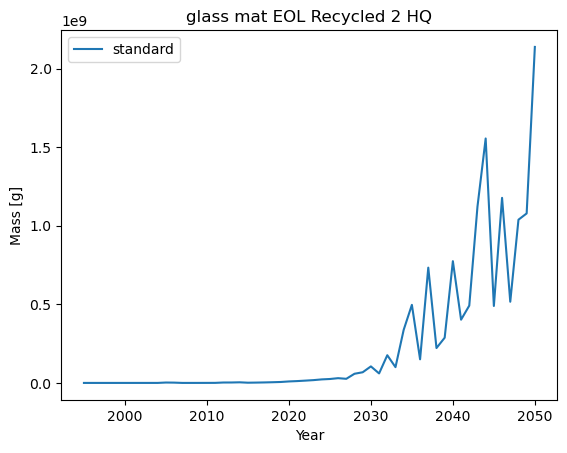

In [14]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_EOL_Recycled_2_HQ')

You can also view all the keywords you can use by calling the function without argumnets:

In [15]:
r1.plotScenariosComparison()

Please pass a keyword:

 ** Scenario Data In Mass  ['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50', 'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff', 'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff', 'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored', 'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield', 'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill', 'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled']

 ** Scenario Data Out Mass  ['Area', 'Cumulative_Active_Area', 'EOL_BadStatus', 'EOL_Landfill0', 'EOL_PATHS', 'EOL_PG', 'Effective_Capacity_[W]', 'Landfill_0_ProjLife', 'MerchantTail_Area', 'MerchantTail_[W]', 'ModuleTotal_MFG', 'P2_stored', 'P3_reMFG', 'P4_recycled', 'PB1_landfill', 'PB2_stored', 'PB3_reMFG', 'PB3_reMFG_unyield', 'PB3_reMFG_yield', 'PB4_recycled', 'PG1_landfill', 'PG2_stored', 'PG3_reMFG', 'PG3_reMFG_unyield', 'PG3_reMFG_yield', 'PG4_recycled', 'Power_Degraded_[W]

Or you can print the dataframe keys

In [16]:
list(r1.scenario[list(r1.scenario.keys())[0]].dataIn_m.keys())

['year',
 'new_Installed_Capacity_[MW]',
 'mod_eff',
 'mod_reliability_t50',
 'mod_reliability_t90',
 'mod_degradation',
 'mod_lifetime',
 'mod_MFG_eff',
 'mod_Repair',
 'mod_MerchantTail',
 'mod_EOL_collection_eff',
 'mod_EOL_pg0_resell',
 'mod_EOL_pg1_landfill',
 'mod_EOL_pg2_stored',
 'mod_EOL_pg3_reMFG',
 'mod_EOL_pg4_recycled',
 'mod_EOL_reMFG_yield',
 'mod_EOL_sp_reMFG_recycle',
 'mod_EOL_pb1_landfill',
 'mod_EOL_pb2_stored',
 'mod_EOL_pb3_reMFG',
 'mod_EOL_pb4_recycled']